# Machine Learning with Python

## Python Setup

__Machine Learning Libraries__

- [pandas](https://pypi.org/project/pandas/): Library for data exploration, manipulation and analysis and convert data into Data Frames (similar to database tables).
- [SciPy](https://pypi.org/project/scipy/): Library used for scientific and technical computing.
- [NumPy](https://pypi.org/project/numpy/): Library for mathematical and scientific computing library for Python
- [matplotlib](https://pypi.org/project/matplotlib/): Library for visualising data and results.
- [Scikit-learn](https://pypi.org/project/scikit-learn/): provides a consistent interface to ML models and covers libraries like NumPy, SciPy and matplotlib
- [Keras](https://pypi.org/project/Keras/): Library that encapsulates complex Deep Learning frameworks.

__Installing scikit-learn__ : 2 options:
1. Install the library with the dependencies (NumPy and SciPy)
2. Install the [Anaconda Distribution](https://www.anaconda.com/distribution/) of Python 
    - Getting started manual available [here](https://docs.anaconda.com/anaconda/user-guide/getting-started/#open-nav-win) for Windows/Linux/macOS.

In [ ]:
conda install scikit-learn

A Machine Learning project has a series of well known steps:
        - Define the problem
        - Load data
        - Evaluate Algorithms
        - Make Predictions

# Supervised Learning: Classification

Consider a multi-class classification problem: classification of iris flowers using the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris). The dataset has:
- 4 attributes/input variables: sepal length, sepal width, petal length, petal width (in cm) --> n= 4
- 150 rows/training examples --> m = 150
- Target classes (3 species of 3 different types of Iris flowers): Iris Setosa, Iris Versicolour, Iris Virginica

# 1. **Problem definition**

Predict the species of an iris flower given its sepal and petal measurements.

# 2. **Load Data**

## 2.1 Importing Python Libraries

In [4]:
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
# scikit-learn
import sklearn

If using Anaconda, pandas, numpy, scipy are included in *scikit-learn*

## 2.2 Load dataset
Loading dataset as a Data Frame using **Pandas**

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] #input features
dataset = pd.read_csv(url, names=names)  #read csv file of the dataset

## 2.2 Summarize Data

In [ ]:
#shape of data
print(dataset.shape)

#display first 5 rows
print(dataset.head(5))

#display the last 5 rows
print(dataset.tail(5))

#print statistical summary
print(dataset.describe())

#print class distribution
print(dataset.groupby('class').size())

## 2.3 Visualising Data

Use of **univariate plots** to better understand each feature variable: Box and whisker plot.

- Boxplot helps in understanding our distribution better.
- It can be used when we require to use the overall statistical information on the distribution of the data and to detect outliers in the data.

### Understanding Boxplot

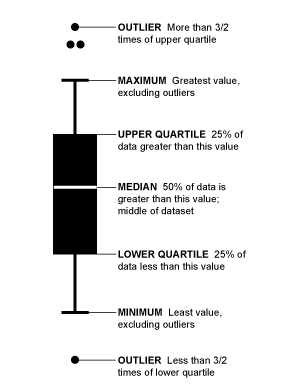

[Source](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)

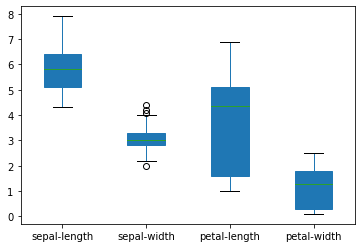

In [44]:
import matplotlib.pyplot as plt
dataset.plot(kind='box', patch_artist=True, sharex=False, sharey=False)
plt.show()

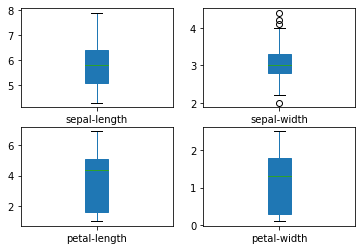

In [38]:
dataset.plot(kind='box', patch_artist=True, subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

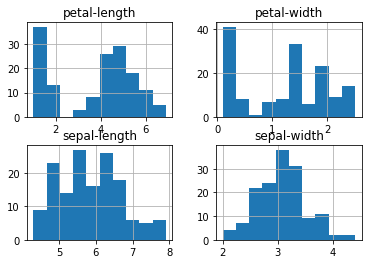

In [45]:
# histograms
dataset.hist()
plt.show()

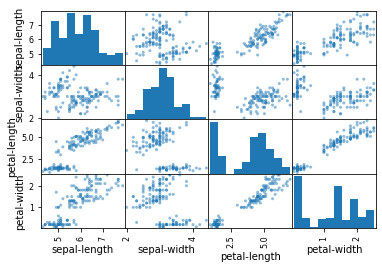

In [50]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

More information about Data Visualisation in Python using *matplotlib, pandas* and *seaborn* can be found [here](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed).

## 3. Evaluating Algorithms

- Features and target variable are separate objects
- Features and target variable should be **NumPy arrays**

In [ ]:
array = dataset.values
X = array[:,0:4] #store feature matrix in "X"
y = array[:,4] #store target vector in "y"

print(X.shape)
print(y.shape)

### Splitting X and y into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [ ]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

### Training the model on the training set

__KNN (K = 5)__

In [24]:
#import model
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

#fit the model with data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 4. Making Predictions

In [25]:
y_pred = knn.predict(X_test)

### Evaluation metrics:

For Classification problems, the following evaluation metrics can be used:

- Classification Accuracy: percentage of correct predictions.
- Confusion Matrix: It is used to describe the performance of a classification model on a set of test data for which true values are known

In [ ]:
# compute classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

__KNN (K = 1)__

In [ ]:
#import model
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

#fit the model with data
knn.fit(X_train, y_train)

#make predictions on the testing set
y_pred = knn.predict(X_test)

# compute classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

__Logistic Regression__

In [ ]:
#import model
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train, y_train)

#make predictions on the testing set
y_pred = logreg.predict(X_test)

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))